## CAMPAIGN DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./DATA/campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [4]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Country                0
dtype: int64

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Country'],
      dtype='object')

In [6]:
#Modifying Income column
df['Income'] = df['Income'].str.replace("$","").str.replace(",","").astype('float32')

In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Country                 0
dtype: int64

- except for **Income** column remaining columns doesn't contain any null values

In [8]:
#filling the missing values wrt Education column
df[df['Income'].isna()]['Education'].unique()

array(['PhD', 'Graduation', '2n Cycle', 'Master'], dtype=object)

In [9]:
#considering only records which are not null
temp_df = df[~df['Income'].isna()][['Education','Income']]

grad = temp_df[temp_df['Education'] == 'Graduation']['Income']
phd = temp_df[temp_df['Education'] == 'PhD']['Income']
master = temp_df[temp_df['Education'] == 'Master']['Income']
_2nc = temp_df[temp_df['Education'] == '2n Cycle']['Income']

Text(0.5, 1.0, '2n Cycle Income')

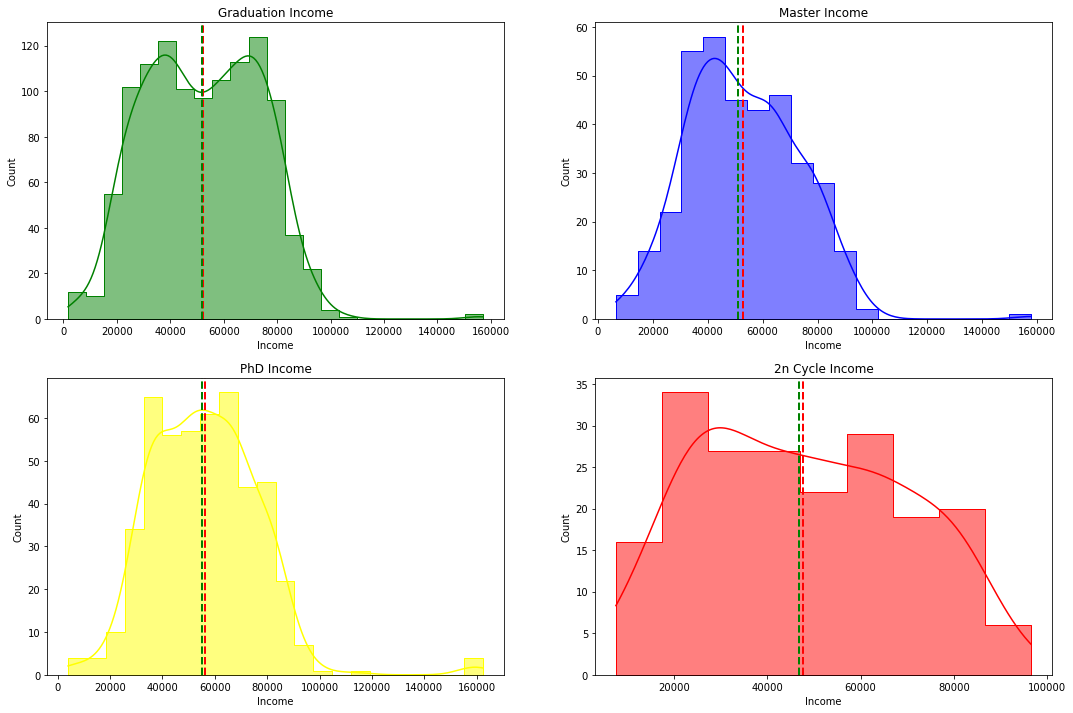

In [10]:
#check distribution of Income for each Education type with out null records
plt.figure(figsize = (18, 12))
plt.subplot(2, 2, 1)
grad_mean = grad.mean()
grad_median = grad.median()
sns.histplot(x = grad, 
             element = 'step', 
             color = 'green', 
             kde = True, 
             label = 'Education')
plt.axvline(grad_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(grad_median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.title("Graduation Income")

plt.subplot(2, 2, 2)
master_mean = master.mean()
master_median = master.median()
sns.histplot(x = master ,
             element = 'step', 
             color = 'blue', 
             kde = True, 
             label = 'Education')
plt.axvline(master_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(master_median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.title("Master Income")

plt.subplot(2, 2, 3)
phd_mean = phd.mean()
phd_median = phd.median()
sns.histplot(x = phd, 
             element = 'step', 
             color = 'yellow', 
             kde = True, 
             label = 'Education')
plt.axvline(phd_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(phd_median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.title("PhD Income")

plt.subplot(2, 2, 4)
_2nc_mean = _2nc.mean()
_2nc_median = _2nc.median()
sns.histplot(x = _2nc, 
             element = 'step', 
             color = 'red', 
             kde = True, 
             label = 'Education')
plt.axvline(_2nc_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(_2nc_median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.title("2n Cycle Income")

<u>From the above distribution plots:</u>
- for a Graduate the both the mean and median Income are same.
- for a Master the mean of Income is higher the median.
- for a Phd both the mean and median of Income is almost close.
- for a 2n cycle the mean of Income is higher the median.

In [11]:
#filling null Income value with the median value wrt Education column
df.loc[df['Education'] == 'Graduation', 'Income'] = \
            df.loc[df['Education'] == 'Graduation', 'Income'].fillna(grad_median)

df.loc[df['Education'] == 'PhD', 'Income'] = \
            df.loc[df['Education'] == 'PhD','Income'].fillna(phd_median)

df.loc[df['Education'] == 'Master', 'Income'] = \
            df.loc[df['Education'] == 'Master','Income'].fillna(master_median)

df.loc[df['Education'] == '2n Cycle', 'Income'] = \
            df.loc[df['Education'] == '2n Cycle','Income'].fillna(_2nc_median)

In [12]:
df["Income"].isna().sum()

0

In [13]:
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2234    66476.0
2235    31056.0
2236    46310.0
2237    65819.0
2238    94871.0
Name: Income, Length: 2239, dtype: float32

In [14]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,1968.802144,51967.960938,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,...,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379
std,3246.372471,11.985494,21412.029297,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,...,2.779240,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2827.500000,1959.000000,35533.500000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,51479.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8423.500000,1977.000000,68277.500000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.shape

(2239, 27)

## EDA

In [16]:
#drop ID column 
df = df.drop("ID", axis = 1)

In [17]:
df.select_dtypes("int64").columns

Index(['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],
      dtype='object')

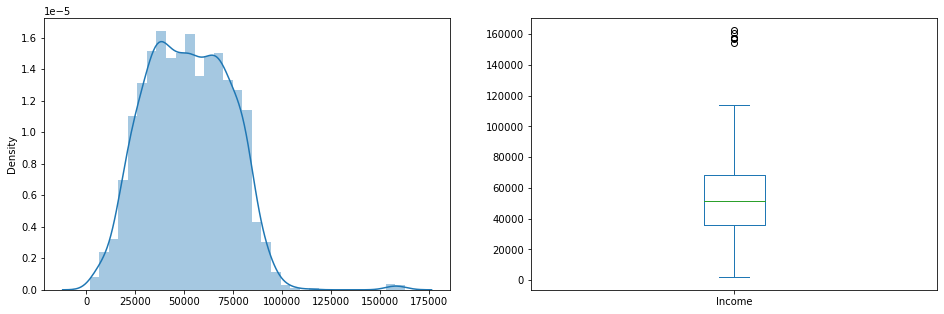

In [18]:
#check the distribution of Income
plt.subplot(121)
sns.distplot(x = df['Income'])

plt.subplot(122)
df['Income'].plot.box(figsize = (16,5))
plt.show()

- There are some outliers in Income distribution

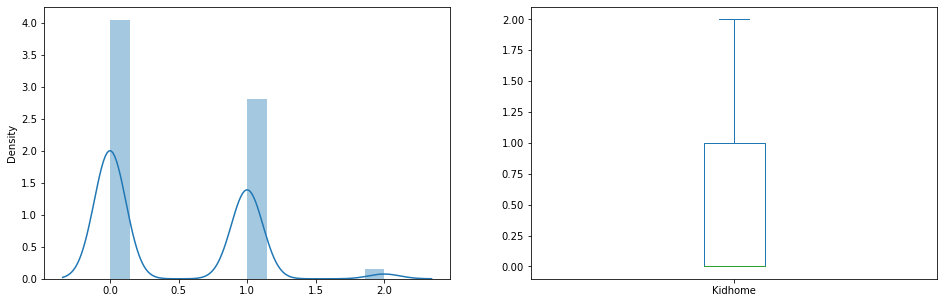

In [19]:
#check the distribution of Income
plt.subplot(121)
sns.distplot(x = df['Kidhome'])

plt.subplot(122)
df['Kidhome'].plot.box(figsize = (16,5))
plt.show()

- Most of the users doesn't have kids or only having one kid at home 

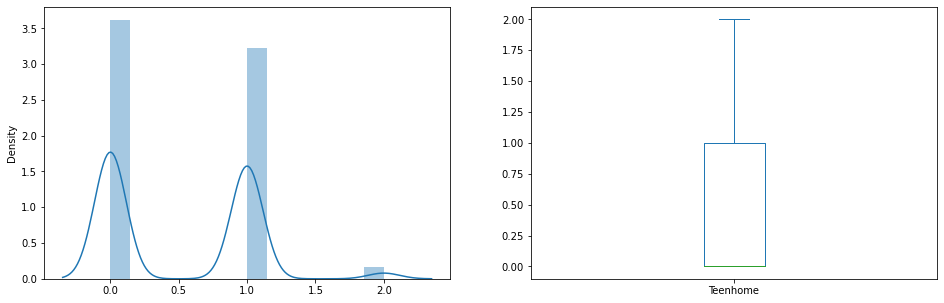

In [20]:
plt.subplot(121)
sns.distplot(x = df['Teenhome'])

plt.subplot(122)
df['Teenhome'].plot.box(figsize = (16,5))
plt.show()

- Most of the users doesn't have kids or only having one kid at home 
- *The distribution of both Kidhome and Teenhome seesm same*

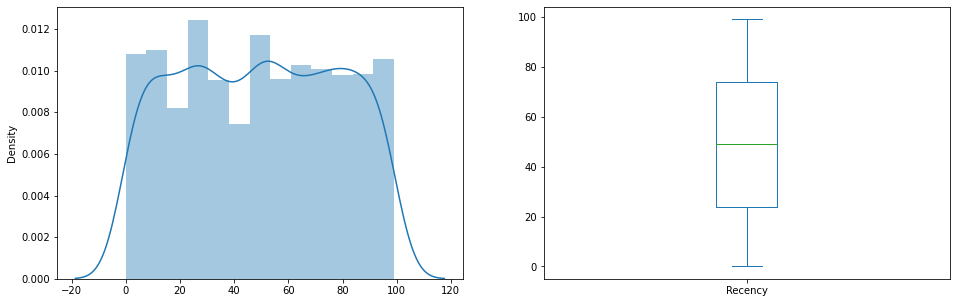

In [21]:
#check the distribution of recency
plt.subplot(121)
sns.distplot(x = df['Recency'])

plt.subplot(122)
df['Recency'].plot.box(figsize = (16,5))
plt.show()

In [22]:
def dist_box(data):
    """
    function plots a combined graph for univariate analysis of 
    continous variable to check spread, central tendency, dispersion and outliers  
    """
    Name=data.name.upper()
    fig,(ax_box,ax_dis) = plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

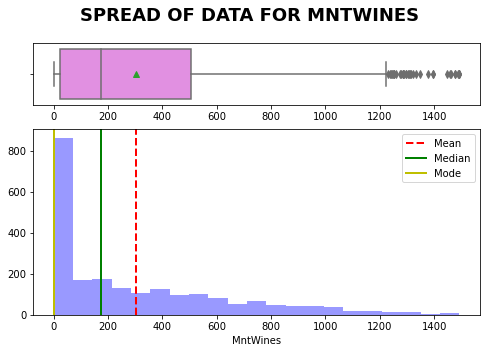

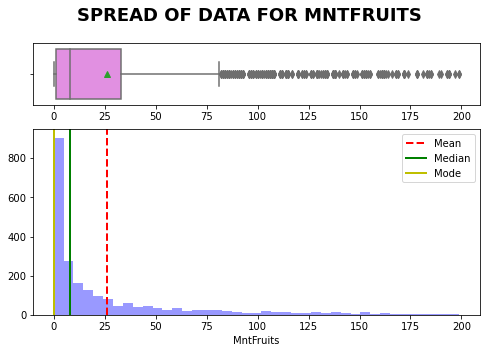

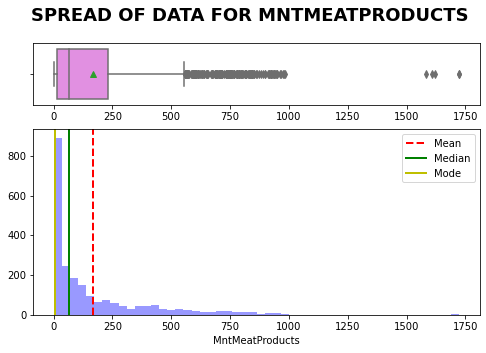

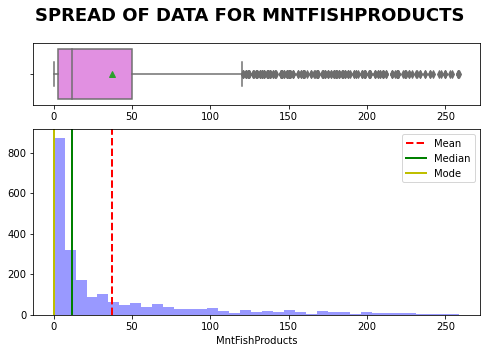

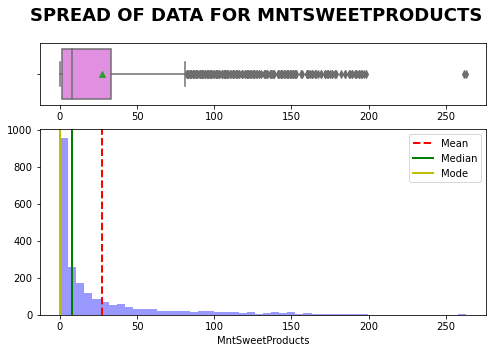

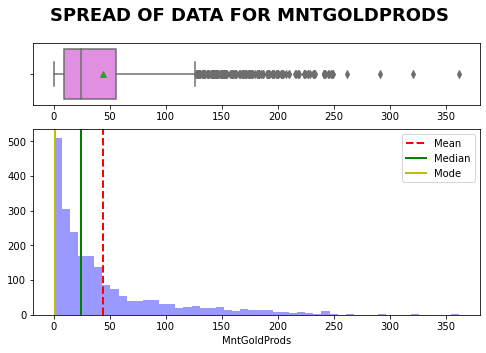

In [23]:
#check distribution of Amount spent of each category
list_col = ['MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds']
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

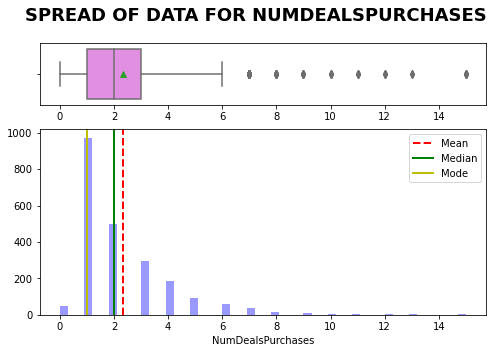

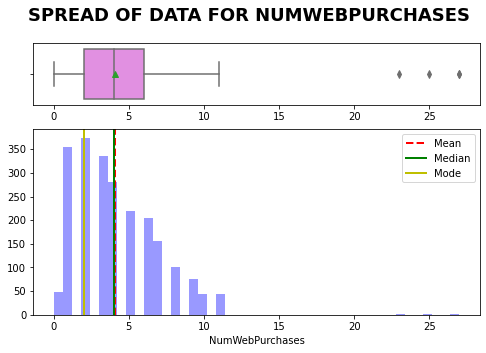

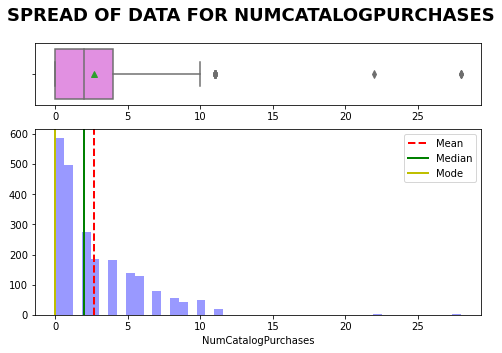

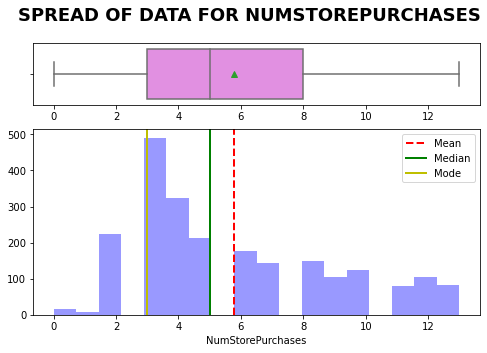

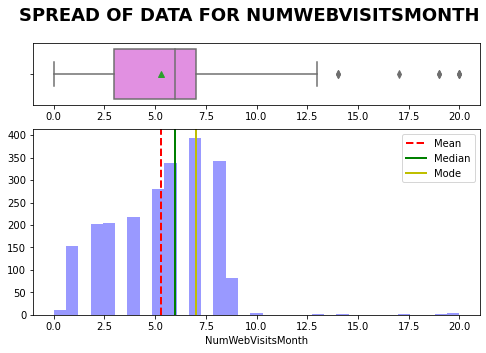

In [24]:
#check distribution of Purchases
list_col = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 
            'NumWebVisitsMonth',]
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

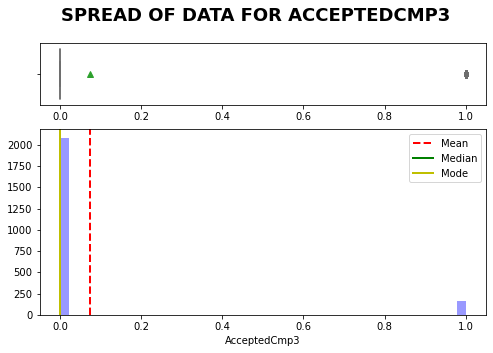

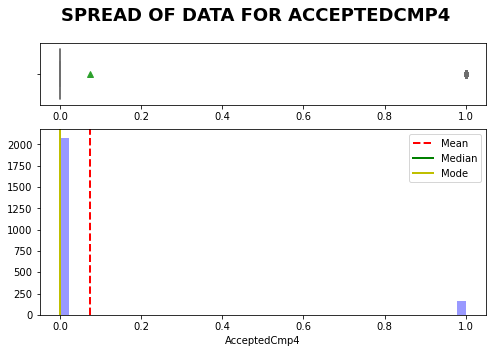

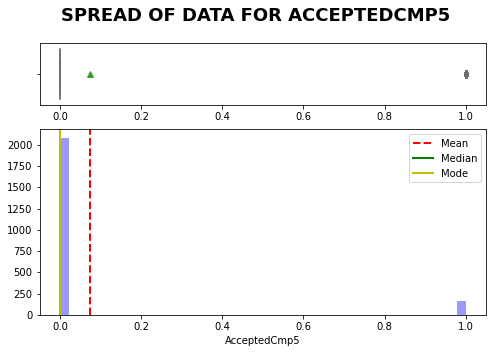

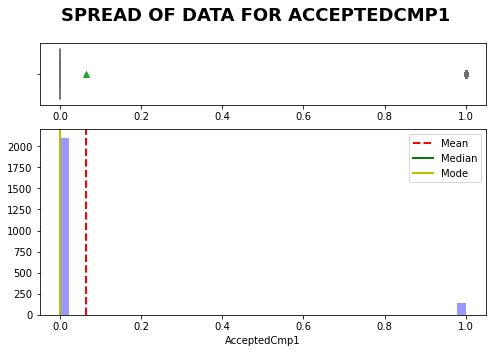

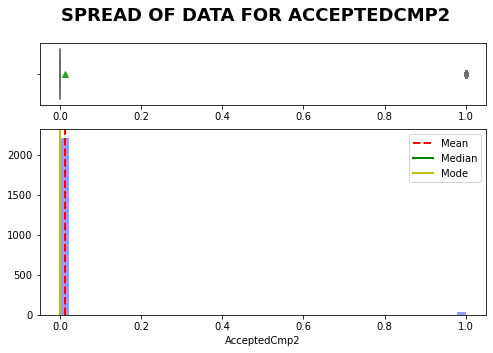

In [25]:
#check distribution of Campagin
list_col = ['AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'AcceptedCmp1',
            'AcceptedCmp2']
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

- Most of the users didn't accepted every campagins

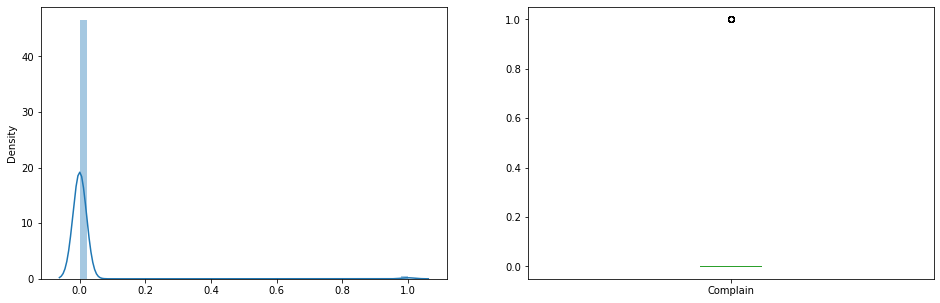

In [26]:
#check the distribution of Complain
plt.subplot(121)
sns.distplot(x = df['Complain'])

plt.subplot(122)
df['Complain'].plot.box(figsize = (16,5))
plt.show()

- Majority of complains are *Zero*

### Feature engineering

<u>create separate columns</u> :<br>
    1. **total_amount_spent**: Total amount spent by each user.<br>
    2. **single**: is user a couple or single<br>
    3. **income_type**: type of income higher or lower<br>
    4. **acceptedcmp**: check whetehr user accepted any campaign or not

In [27]:
#adding Total Amount spent by each user based on all categories
df['total_amount_spent'] = df[['MntWines', 'MntFruits','MntMeatProducts',
                               'MntFishProducts','MntSweetProducts',
                               'MntGoldProds']].sum(axis = 1)

In [28]:
#create a column which says whether user is single or not
"""
if single: 1
if not single : 0
"""
df['single'] = np.where(df['Marital_Status'].isin(['Married','Together']),0,1)

In [29]:
#creating a income_type column based on income
income_median = df["Income"].median()
df['income_type']=np.where(df["Income"]>= income_median, "high", "low")

In [30]:
#create a acceptedcmp to check whether user accpeted any campagin or not
"""
if accepted: 1
if not accepted : 0
"""
df['acceptedcmp'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                        'AcceptedCmp1','AcceptedCmp2']].any(axis = 1).astype('int')

In [31]:
#by observing distribution of Income alll the ouliers are above 120000 and
# only neglible users are there to consider
df[(df['Income'] >= 120000)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,total_amount_spent,single,income_type,acceptedcmp
325,1977,Graduation,Together,157146.0,0,0,4/29/13,13,1,0,...,0,0,0,0,0,SA,1730,0,high,0
497,1982,PhD,Married,160803.0,0,0,8/4/12,21,55,16,...,0,0,0,0,0,US,1717,0,high,0
730,1976,PhD,Together,162397.0,1,1,6/3/13,31,85,1,...,0,0,0,0,0,SP,107,0,high,0
852,1971,Master,Together,157733.0,1,0,6/4/13,37,39,1,...,0,0,0,0,0,SP,59,0,high,0
1825,1975,Graduation,Divorced,153924.0,0,0,2/7/14,81,1,1,...,0,0,0,0,0,SP,6,1,high,0
1924,1949,PhD,Married,156924.0,0,0,8/29/13,85,2,1,...,0,0,0,0,0,CA,8,0,high,0
2203,1973,PhD,Married,157243.0,0,1,3/1/14,98,20,2,...,0,0,0,0,0,IND,1608,0,high,0


In [32]:
#cosnidering users who are below 120000
df = df[df['Income'] <=120000]

## Hypothesis Testing

In [33]:
#considering only few required columns for hyopthesis testing
new_df = df[['Education','Income','total_amount_spent', 
             'single','income_type', 'acceptedcmp']]

### Is income of customers dependent on their education

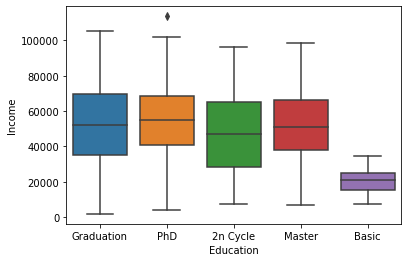

In [34]:
sns.boxplot(x = new_df['Education'], y = new_df['Income'])
plt.show()

In [35]:
grad = new_df[new_df['Education'] == 'Graduation']['Income']
phd = new_df[new_df['Education'] == 'PhD']['Income']
master = new_df[new_df['Education'] == 'Master']['Income']
_2nc = new_df[new_df['Education'] == '2n Cycle']['Income']
basic = new_df[new_df['Education'] == 'Basic']['Income']

- The samples are more than 2 we can chose ANOVA to check whetehr income of customers dependent on their education.
- Before applying ANOVA we have to check whether the samples satisfies the assumptions of ANOVA test

Text(0.5, 1.0, 'Master Income')

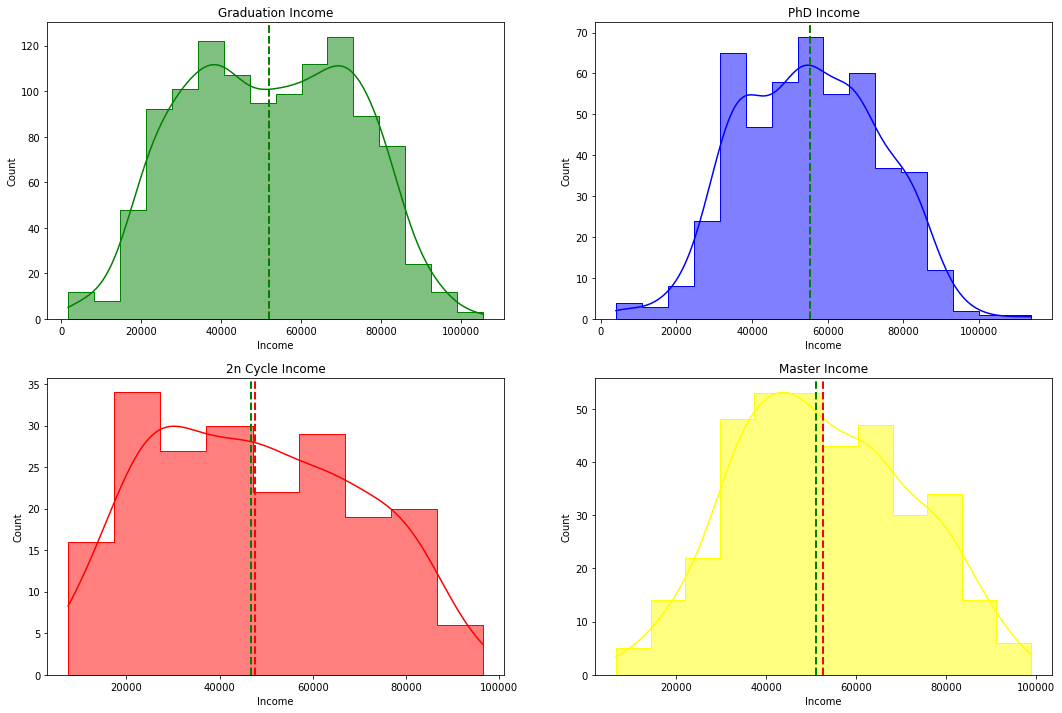

In [36]:
#check distribution of Income for each Education type
plt.figure(figsize = (18, 12))
plt.subplot(2, 2, 1)
grad_mean = grad.mean()
graad_median = grad.median()
sns.histplot(grad, 
             element = 'step', 
             color = 'green', 
             kde = True, 
             label = 'Education')
plt.axvline(grad_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(grad_median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.title("Graduation Income")

plt.subplot(2, 2, 2)
phd_mean = phd.mean()
phd_median = phd.median()
sns.histplot(phd, 
             element = 'step', 
             color = 'blue', 
             kde = True, 
             label = 'Education')
plt.axvline(phd_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(phd_median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.title("PhD Income")

plt.subplot(2, 2, 3)
_2nc_mean = _2nc.mean()
_2nc_median = _2nc.median()
sns.histplot(new_df.loc[new_df['Education'] == '2n Cycle', 'Income'], 
             element = 'step', 
             color = 'red', 
             kde = True, 
             label = 'Education')
plt.axvline(_2nc_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(_2nc_median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.title("2n Cycle Income")

plt.subplot(2, 2, 4)
master_mean = master.mean()
master_median = master.median()
sns.histplot(master, 
             element = 'step', 
             color = 'yellow', 
             kde = True, 
             label = 'Education')
plt.axvline(master_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(master_median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.title("Master Income")

Text(0.5, 1.0, 'Basic Income')

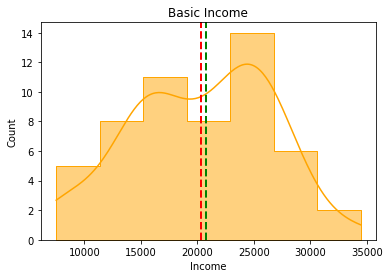

In [37]:
basic_mean = basic.mean()
basic_median = basic.median()
sns.histplot(basic, 
             element = 'step', 
             color = 'orange', 
             kde = True, 
             label = 'Education')
plt.axvline(basic_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(basic_median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.title("Basic Income")

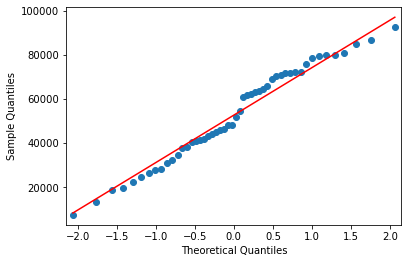

In [38]:
#visual test to check normal distribution
qqplot(grad.sample(50), line="s")
plt.show()

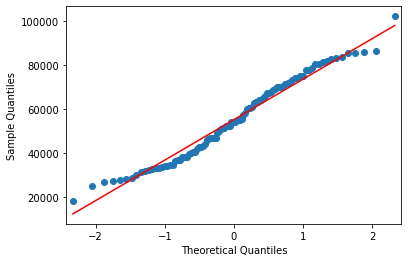

In [39]:
qqplot(phd.sample(100), line="s")
plt.show()

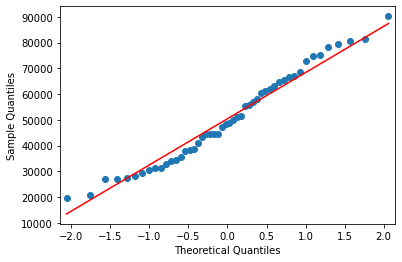

In [40]:
qqplot(master.sample(50), line="s")
plt.show()

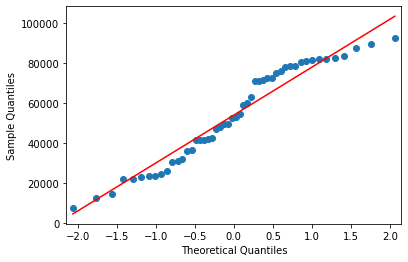

In [41]:
qqplot(_2nc.sample(50), line="s")
plt.show()

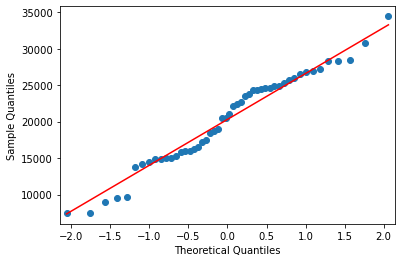

In [42]:
qqplot(basic.sample(50), line="s")
plt.show()

- The above distributions of Income wrt Educations doesn't seem normal
- Even in qqplot visual check the data is not well aligned on the line.

- Apply Shapiro-Wilk test to check the normality of data

In [43]:
#apply shapiro wilk test to check normal distribution
education = ['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']
for i in education:
    print(f"if Education  = {i}")
    test_stat, p_value = shapiro(df.loc[df['Education'] == i, 'Income'])
    print('p-value', p_value)
    if p_value < 0.05:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')    
    print("="*60)

if Education  = Graduation
p-value 4.255140337305896e-11
The sample does not follow normal distribution
if Education  = PhD
p-value 0.005964319687336683
The sample does not follow normal distribution
if Education  = 2n Cycle
p-value 0.00023905107809696347
The sample does not follow normal distribution
if Education  = Master
p-value 0.005110414698719978
The sample does not follow normal distribution
if Education  = Basic
p-value 0.20597457885742188
The sample follows normal distribution


- The shapiro Wilk concluded that data doesn't follow normal distribition

- To establish whether this difference we see in variance is chance or significant, we have to use Levene test

In [44]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(grad, phd,master, _2nc, basic)
print(p_value)
if p_value < 0.05:
    print("Variances are not similar")
else:
    print("Variance are similar")

1.0153007713547942e-18
Variances are not similar


- If assumptions of ANOVA don't hold, we need **Kruskal Wallis** test

In [45]:
# H0: Variances are equal
# Ha: Variances are not equal
krukal_stat, p_value = kruskal(grad, phd,master, _2nc, basic)
print(p_value)
if p_value < 0.05:
    print("Variances are not similar")
else:
    print("Variance are similar")

1.4023375184484297e-29
Variances are not similar


<div class="alert alert-block alert-info">
<b>Conclusion:</b> The customers Income doesn't depend on their Education.
</div>

### Do higher income people spend more (take in account spending in all categories together)

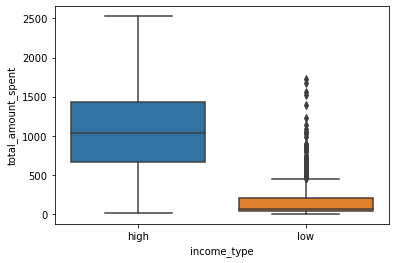

In [46]:
#check the data distribution
sns.boxplot(x = new_df['income_type'] ,y = new_df['total_amount_spent'])
plt.show()

- High income people spends more than the lower income people

In [47]:
high = new_df[new_df['income_type']=='high']['total_amount_spent']
low = new_df[new_df['income_type']=='low']['total_amount_spent']

In [48]:
#HO: Higher Income peope do not spend more
#H1: Higher Income peope spendmore
t_stat, p_value = ttest_ind(high, low, alternative = "greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Higher Income peope spend more")
else:
    print("Accept H0")
    print("Higher Income peope do not spend more")

0.0
Reject H0
Higher Income peope spend more


<AxesSubplot:xlabel='Income', ylabel='total_amount_spent'>

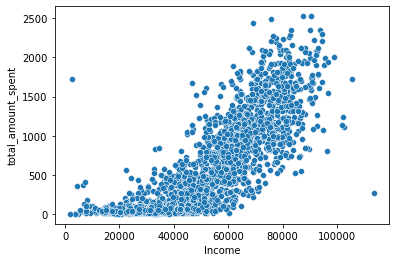

In [56]:
sns.scatterplot(x = df['Income'], y = df['total_amount_spent'])

In [57]:
from scipy.stats import pearsonr

In [58]:
pearsonr(df['Income'],df['total_amount_spent'])

(0.819739593070272, 0.0)

<div class="alert alert-block alert-info">
<b>Conclusion:</b> Higher Income Spend more.
</div>

### Do couples spend more or less money on wine than people living alone (set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone')

In [49]:
new_df['wine_amt'] = df['MntWines']

<AxesSubplot:xlabel='single', ylabel='wine_amt'>

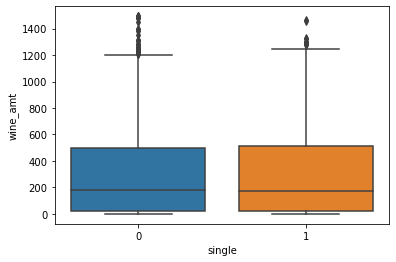

In [50]:
sns.boxplot(x = new_df['single'], y =new_df['wine_amt'])

- The above plot shows that both couples and Alone people spent almost equally

- Apply ttest of independence 

In [51]:
single = new_df[new_df['single']==1]['wine_amt']
couple = new_df[new_df['single']==0]['wine_amt']

In [52]:
#HO: couples do not spent more than alone
#H1: couple spent more than alone
t_stat, p_value = ttest_ind(couple, single, alternative = "two-sided")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("couples spent more than alone")
else:
    print("Accept H0")
    print("couples do not spent more than alone")

0.8249767308690862
Accept H0
couples do not spent more than alone


<div class="alert alert-block alert-info">
<b>Conclusion:</b> Couples do not spent more than Alone people.
</div>

### Are people with lower income are more attracted towards campaign or simply put accept more campaigns. ( create two income brackets one below median , other above median income and create a column which tells if they have ever accepted any campaign)

In [53]:
income_cmp = pd.crosstab(index = new_df['acceptedcmp'], columns=new_df['income_type'])
income_cmp

income_type,high,low
acceptedcmp,,
0,767,1002
1,346,117


<AxesSubplot:xlabel='acceptedcmp'>

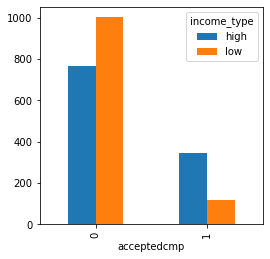

In [54]:
income_cmp.plot(kind = "bar", figsize= (4,4))

In [55]:
# H0: Lower Income people do not accept more campaigns---independent
# H1: Lower Income people accept more campaigns ---dependent 
chi_stat, p_value, d_f, exp_value = chi2_contingency(income_cmp) # chi_stat, p_value, df, expected value
print(chi_stat)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Lower Income people accept more campaigns")
    print("There is an association between income_type and accpetedcmp.")
else:
    print("Accept H0")
    print("Lower Income people donot accept more campaigns")
    print("There is NO association between income_type and accpetedcmp.")

143.21444459383383
5.2764747385221205e-33
Reject H0
Lower Income people accept more campaigns
There is an association between income_type and accpetedcmp.


<div class="alert alert-block alert-info">
<b>Conclusion:</b> Lower Income people accept more campaigns
</div>

In [59]:
from scipy.stats import f_oneway

In [60]:
college_students = [71, 62, 63, 59, 67, 68, 63, 62, 66, 65, 61, 60]
athletes = [67, 68, 72, 66, 65, 69, 71, 70, 65, 64, 68]
army = [68, 67, 66, 68, 69, 70, 71, 69, 66, 67]

In [61]:
f_oneway(college_students, athletes, army)

F_onewayResult(statistic=7.899836075209478, pvalue=0.0017534092082519943)